In [1]:
import glam
import pandas as pd
import numpy as np
import os.path

import matplotlib.pyplot as plt
from analysis_functions import make_sure_path_exists

In [2]:
make_sure_path_exists('results/estimates')
make_sure_path_exists('results/dic')
make_sure_path_exists('results/predictions')

In [3]:
np.random.seed(23) # from random.org

# 2.1 GLAM Individual Fits

## Load data

In [4]:
# Load data
sufix = '_FixBin5'
data = pd.read_csv(str('data/FF2018_data/GlamDataFF2018_Like_Bin_v2.csv'))
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
0,0,0,0,2009,0.0,0.0,0.568396,0.431604
1,0,1,0,3371,5.0,4.0,0.762332,0.237668
2,0,2,1,1700,0.0,5.0,0.446809,0.553191
3,0,3,1,7466,1.0,2.0,0.532352,0.467648
4,0,4,1,1889,5.0,5.0,0.529736,0.470264


## Fit GLAM variants individually

### 1. full GLAM

In [5]:
# Fitting full GLAM
print('Fitting full GLAM individually...')

glam_full = glam.GLAM(data)
glam_full.make_model('individual', gamma_bounds=(-1, 1), t0_val=0)

if not os.path.exists(str('results/estimates/glam_full_individual_like'+sufix+'.npy')):
    glam_full.fit(method='NUTS', tune=1000)
else:
    print('  Found old parameter estimates in "results/estimates". Skipping estimation...')
    glam_full.estimates = np.load(str('results/estimates/glam_full_individual_like'+sufix+'.npy'))
    
# Save parameter estimates
np.save(str('results/estimates/glam_full_individual_like'+sufix+'.npy'), glam_full.estimates)

Fitting full GLAM individually...
Generating single subject models for 33 subjects...
  Found old parameter estimates in "results/estimates". Skipping estimation...


In [6]:
#estimates_like = pd.DataFrame(glam_full.estimates)
#estimates_like.to_csv("results/params_estimates/params_indiv_like.csv")

In [62]:
# Predictions
print('Predicting individual subject data using full GLAM...')

if not os.path.exists(str('results/predictions/glam_full_individual_like'+sufix+'.csv')):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv(str('results/predictions/glam_full_individual_like'+sufix+'.csv'), index=False)
else:
    print('  Found old individual full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv(str('results/predictions/glam_full_individual_like'+sufix+'.csv'))

glam_full.prediction.head()

Predicting individual subject data using full GLAM...


,choice,repeat,rt,subject,trial,item_value_0,gaze_0,item_value_1,gaze_1
0,1.0,0.0,3340.0,0.0,0.0,0.0,0.568396,0.0,0.431604
1,0.0,1.0,2464.0,0.0,0.0,0.0,0.568396,0.0,0.431604
2,0.0,2.0,7202.0,0.0,0.0,0.0,0.568396,0.0,0.431604
3,1.0,3.0,2883.0,0.0,0.0,0.0,0.568396,0.0,0.431604
4,0.0,4.0,4305.0,0.0,0.0,0.0,0.568396,0.0,0.431604


### 2 No-bias $(\gamma=1)$ GLAM

In [8]:
# Fitting no-bias GLAM
print('Fitting no-bias GLAM individually...')

glam_nobias = glam.GLAM(data)
glam_nobias.make_model('individual', gamma_val=1, t0_val=0)

if not os.path.exists(str('results/estimates/glam_nobias_individual_like'+sufix+'.npy')):
    glam_nobias.fit(method='NUTS', tune=1000)
else:
    print('  Found old parameter estimates in "results/estimates". Skipping estimation...')
    glam_nobias.estimates = np.load(str('results/estimates/glam_nobias_individual_like'+sufix+'.npy'))
    
# Save parameter estimates
np.save(str('results/estimates/glam_nobias_individual_like'+sufix+'.npy'), glam_nobias.estimates)

Fitting no-bias GLAM individually...
Generating single subject models for 33 subjects...
  Found old parameter estimates in "results/estimates". Skipping estimation...


In [9]:
# Predictions
print('Predicting individual subject data using no-bias GLAM...')

if not os.path.exists(str('results/predictions/glam_nobias_individual_like'+sufix+'.csv')):
    glam_nobias.predict(n_repeats=50)
    glam_nobias.prediction.to_csv(str('results/predictions/glam_nobias_individual_like'+sufix+'.csv'), index=False)
else:
    print('  Found old individual full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_nobias.prediction = pd.read_csv(str('results/predictions/glam_nobias_individual_like'+sufix+'.csv'))

glam_nobias.prediction.head()

Predicting individual subject data using no-bias GLAM...
  Found old individual full GLAM predictions in "results/predictions". Skipping prediction...


,choice,repeat,rt,subject,trial,item_value_0,gaze_0,item_value_1,gaze_1
0,0.0,0.0,2849.0,0.0,0.0,0.0,0.568396,0.0,0.431604
1,1.0,1.0,3621.0,0.0,0.0,0.0,0.568396,0.0,0.431604
2,0.0,2.0,2899.0,0.0,0.0,0.0,0.568396,0.0,0.431604
3,0.0,3.0,6613.0,0.0,0.0,0.0,0.568396,0.0,0.431604
4,1.0,4.0,3596.0,0.0,0.0,0.0,0.568396,0.0,0.431604


## 2. Plot fit

Close Figure to continue...


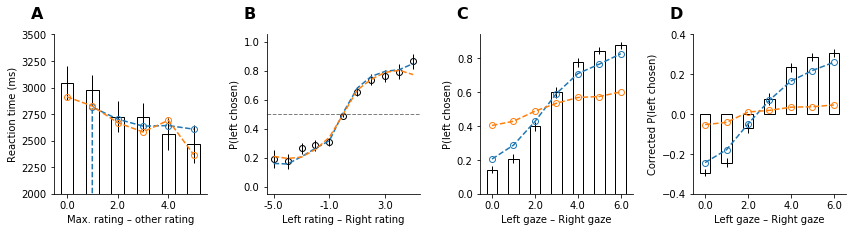

In [63]:
print('Close Figure to continue...')
glam.plot_fit(data, [glam_full.prediction, glam_nobias.prediction]);
plt.show()

## Estimated Params

In [11]:
## TO PLOT ESTIMATED PARAMETERS ##

params_participant = pd.DataFrame(columns=['SNR','b','gamma','p_error','s','t0','tau','v'])
for i in range(len(glam_full.estimates)):
    df1 = pd.DataFrame.from_dict(glam_full.estimates[i])
    params_participant = pd.concat([params_participant, df1])
    
params_participant = params_participant.reset_index(drop=True)

In [12]:
params_participant

,SNR,b,gamma,p_error,s,t0,tau,v
0,186.35,1.0,-0.60,0.05,0.007540,0.0,2.17,0.000041
1,129.40,1.0,0.34,0.05,0.009890,0.0,0.40,0.000072
2,147.83,1.0,0.50,0.05,0.009087,0.0,1.10,0.000061
3,204.93,1.0,-0.47,0.05,0.008122,0.0,3.19,0.000039
4,96.03,1.0,-0.63,0.05,0.006074,0.0,4.97,0.000067
5,99.03,1.0,-0.28,0.05,0.006729,0.0,0.32,0.000067
6,112.09,1.0,-0.74,0.05,0.009258,0.0,0.39,0.000076
7,161.72,1.0,-0.53,0.05,0.007369,0.0,1.20,0.000042
8,153.98,1.0,-0.92,0.05,0.008440,0.0,0.61,0.000062
9,249.23,1.0,-0.46,0.05,0.008951,0.0,4.87,0.000036


In [64]:
testa = glam_full.prediction

In [65]:
xlims =(0, 10)

# Compute relevant variables
df = glam.plots.add_difficulty(testa)

# Compute summary statistics
subject_means = df.groupby(['subject', 'difficulty']).rt.mean()
means = subject_means.groupby('difficulty').mean()[xlims[0]:xlims[1]]
sems = subject_means.groupby('difficulty').sem()[xlims[0]:xlims[1]]


In [66]:
subject_means[32]

difficulty
0.0    3689.338947
1.0    3622.744444
2.0    3507.730526
3.0    3632.082500
Name: rt, dtype: float64

In [67]:
means

difficulty
0.0   -2.331608e+16
1.0    2.816323e+03
2.0    2.702807e+03
3.0    2.636861e+03
4.0    2.642040e+03
5.0    2.608085e+03
Name: rt, dtype: float64

## Just Tests

In [67]:
data
data_difficulty = glam.plots.add_difficulty(data)

In [68]:
data_difficulty 

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1,difficulty
0,0,0,0,2009,0.0,0.0,0.568396,0.431604,0.0
1,0,1,0,3371,5.0,4.0,0.762332,0.237668,1.0
2,0,2,1,1700,0.0,5.0,0.446809,0.553191,5.0
3,0,3,1,7466,1.0,2.0,0.532352,0.467648,1.0
4,0,4,1,1889,5.0,5.0,0.529736,0.470264,0.0
5,0,5,1,2227,4.0,4.0,0.370529,0.629471,0.0
6,0,6,0,4259,4.0,0.0,0.482254,0.517746,4.0
7,0,7,0,3505,3.0,0.0,0.670739,0.329261,3.0
8,0,8,0,2548,3.0,0.0,0.528497,0.471503,3.0
9,0,9,1,3226,0.0,5.0,0.581579,0.418421,5.0


In [ ]:
data.to_csv('test_erasable.csv', index=False)

In [ ]:
glam.plots.add_difficulty(data)

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

glam.plots.plot_rt_by_difficulty(data,
                          xlims=(0, 10), xlabel_skip=2,
                          ax=axs[0])

#plot_rt_by_difficulty(data, predictions=None, ax=None, xlims=(1.5, 8.5), xlabel_skip=2)

In [ ]:
fig

In [ ]:
axs

In [ ]:
dataframes

In [ ]:
#if predictions is None:
xlims=(0, 10)
df = glam.plots.add_difficulty(data)
subject_means = df.groupby(['subject', 'difficulty']).rt.mean()
means = subject_means.groupby('difficulty').mean()[xlims[0]:xlims[1]]
sems = subject_means.groupby('difficulty').sem()[xlims[0]:xlims[1]]

#elif isinstance(predictions, list):
#    dataframes = [data] + predictions
#else:
#    dataframes = [data] + [predictions]

In [ ]:
x = np.arange(len(means))
predicted = False
if not predicted:  # plot underlying data
    ax.bar(x, means,
            linewidth=1, edgecolor='k', facecolor='w',
            width=0.5)
    ax.vlines(x, means - sems, means + sems,
            linewidth=1, color='k')


In [ ]:
ax

In [ ]:
for i, dataframe in enumerate(dataframes):

        df = dataframe.copy()

        # Compute relevant variables
        df = add_difficulty(df)

        # Compute summary statistics
        subject_means = df.groupby(['subject', 'difficulty']).rt.mean()
        means = subject_means.groupby('difficulty').mean()[xlims[0]:xlims[1]]
        sems = subject_means.groupby('difficulty').sem()[xlims[0]:xlims[1]]

        x = np.arange(len(means))

        predicted = False if i == 0 else True

        if not predicted:  # plot underlying data
            ax.bar(x, means,
                   linewidth=1, edgecolor='k', facecolor='w',
                   width=0.5)
            ax.vlines(x, means - sems, means + sems,
                      linewidth=1, color='k')

        else:  # plot predictions
            ax.plot(x, means, '--o', markerfacecolor='none')